In [2]:
import sqlite3
import pandas as pd
from pathlib import Path

project_root = Path.cwd().parents[0]  # if launched from notebooks
db_path = project_root / "data" / "processed" / "satellites.db"
print("DB path:", db_path)

DB path: C:\Users\Alessio\Desktop\Portfolio_data_analysis\satellite_data_analysis\data\processed\satellites.db


In [3]:
conn = sqlite3.connect(db_path)

query = "SELECT COUNT(*) AS n_rows FROM satellites;"
df_count = pd.read_sql_query(query, conn)

conn.close()
df_count

,n_rows
0,13551


In [4]:
conn = sqlite3.connect(db_path)

query = "SELECT * FROM satellites LIMIT 5;"
df_head = pd.read_sql_query(query, conn)

conn.close()
df_head

,norad_id,name,object_type,satellite_constellation,altitude_km,altitude_category,orbital_band,congestion_risk,inclination,eccentricity,launch_year_estimate,days_in_orbit_estimate,orbit_lifetime_category,mean_motion,epoch,data_source,snapshot_date,country,last_seen
0,900,CALSPHERE 1,PAYLOAD,Other,976.884937,Low LEO,LEO-Polar,LOW,90.2215,0.002694,2023,0,<1yr,13.763434,2025-12-01 05:13:21.035712,celestrak,2025-12-01,US,2025-12-01
1,902,CALSPHERE 2,PAYLOAD,Other,1061.676342,Mid LEO,LEO-Polar,LOW,90.2363,0.002049,2023,0,<1yr,13.528813,2025-12-01 08:07:51.479328,celestrak,2025-12-01,US,2025-12-01
2,1361,LCS 1,PAYLOAD,Other,2787.875054,High LEO,MEO,LOW,32.1433,0.001342,2023,0,<1yr,9.893094,2025-12-01 06:07:31.789920,celestrak,2025-12-01,US,2025-12-01
3,1512,TEMPSAT 1,PAYLOAD,Other,1133.287003,Mid LEO,LEO-Polar,HIGH,89.9889,0.007145,2023,0,<1yr,13.335808,2025-12-01 10:59:03.479424,celestrak,2025-12-01,US,2025-12-01
4,1520,CALSPHERE 4A,PAYLOAD,Other,1123.333009,Mid LEO,LEO-Polar,HIGH,89.9090,0.006829,2023,0,<1yr,13.362361,2025-12-01 11:13:16.955040,celestrak,2025-12-01,US,2025-12-01


In [5]:
import sqlite3
import pandas as pd
from pathlib import Path

project_root = Path.cwd().parents[0]
db_path = project_root / "data" / "processed" / "satellites.db"

conn = sqlite3.connect(db_path)

# Otteniamo i metadati della tabella
query = "PRAGMA table_info(satellites);"
df_info = pd.read_sql_query(query, conn)

conn.close()

df_info

,cid,name,type,notnull,dflt_value,pk
0,0,norad_id,INTEGER,0,None,1
1,1,name,TEXT,0,None,0
2,2,object_type,TEXT,0,None,0
3,3,satellite_constellation,TEXT,0,None,0
4,4,altitude_km,REAL,0,None,0
5,5,altitude_category,TEXT,0,None,0
6,6,orbital_band,TEXT,0,None,0
7,7,congestion_risk,TEXT,0,None,0
8,8,inclination,REAL,0,None,0
9,9,eccentricity,REAL,0,None,0


In [6]:
from pathlib import Path
import sqlite3

project_root = Path.cwd().parents[0]
db_path = project_root / "data" / "processed" / "satellites.db"
clean_sql_path = project_root / "sql" / "data_cleaning.sql"

conn = sqlite3.connect(db_path)
cur = conn.cursor()

with open(clean_sql_path, "r", encoding="utf-8") as f:
    cleaning_sql = f.read()

cur.executescript(cleaning_sql)
conn.commit()
conn.close()

print("Table satellites_clean created!")

Table satellites_clean created!


In [7]:
conn = sqlite3.connect(db_path)
df = pd.read_sql_query("SELECT period_minutes FROM satellites_clean LIMIT 10;", conn)
conn.close()
df

,period_minutes
0,104.625052
1,106.439491
2,145.556085
3,107.979956
4,107.765388
5,97.699997
6,1315.966571
7,102.891107
8,103.093665
9,1466.991156


In [8]:
conn = sqlite3.connect(db_path)

df = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

conn.close()
df

,name
0,satellites
1,satellites_clean


In [9]:
with sqlite3.connect(db_path) as conn:
    tables = pd.read_sql_query(
        "SELECT name FROM sqlite_master WHERE type='table';",
        conn
    )
    print(tables)

    sample = pd.read_sql_query(
        "SELECT * FROM satellites_clean LIMIT 5;",
        conn
    )

sample

               name
0        satellites
1  satellites_clean


,norad_id,name,object_type,satellite_constellation,altitude_km,altitude_category,orbital_band,congestion_risk,inclination,eccentricity,launch_year_estimate,days_in_orbit_estimate,orbit_lifetime_category,mean_motion,epoch,data_source,snapshot_date,country,last_seen,period_minutes
0,900,CALSPHERE 1,PAYLOAD,Other,976.884937,Low LEO,LEO-Polar,LOW,90.2215,0.002694,2023,0,<1yr,13.763434,2025-12-01 05:13:21.035712,celestrak,2025-12-01,US,2025-12-01,104.625052
1,902,CALSPHERE 2,PAYLOAD,Other,1061.676342,Mid LEO,LEO-Polar,LOW,90.2363,0.002049,2023,0,<1yr,13.528813,2025-12-01 08:07:51.479328,celestrak,2025-12-01,US,2025-12-01,106.439491
2,1361,LCS 1,PAYLOAD,Other,2787.875054,High LEO,MEO,LOW,32.1433,0.001342,2023,0,<1yr,9.893094,2025-12-01 06:07:31.789920,celestrak,2025-12-01,US,2025-12-01,145.556085
3,1512,TEMPSAT 1,PAYLOAD,Other,1133.287003,Mid LEO,LEO-Polar,HIGH,89.9889,0.007145,2023,0,<1yr,13.335808,2025-12-01 10:59:03.479424,celestrak,2025-12-01,US,2025-12-01,107.979956
4,1520,CALSPHERE 4A,PAYLOAD,Other,1123.333009,Mid LEO,LEO-Polar,HIGH,89.9090,0.006829,2023,0,<1yr,13.362361,2025-12-01 11:13:16.955040,celestrak,2025-12-01,US,2025-12-01,107.765388


In [41]:
#Parser to import and separate the queries
def load_queries():
    project_root = Path.cwd().parent
    sql_file = project_root / "sql" / "exploration_queries.sql"

    if not sql_file.exists():
        raise FileNotFoundError(f"SQL file not found at: {sql_file}")

    with open(sql_file, "r", encoding="utf-8") as f:
        text = f.read()

    queries = {}
    current_name = None
    current_lines = []

    for line in text.splitlines():
        stripped = line.strip()

        if stripped.startswith("-- Q"):
            # Save previous query
            if current_name and current_lines:
                queries[current_name] = "\n".join(current_lines).strip()
                current_lines = []

            # Extract query name
            parts = stripped.split(":", 1)
            current_name = parts[1].strip() if len(parts) > 1 else stripped
        else:
            if stripped != "":
                current_lines.append(line)

    # Save last query
    if current_name and current_lines:
        queries[current_name] = "\n".join(current_lines).strip()

    return queries

queries = load_queries()
queries.keys()

dict_keys(['-- Q1) Count each object type', '-- Q2) altitude bins by object type', '-- Q3) Distribution per orbital class', '-- Q4) Altitude and eccentricity per orbital class', '-- Q5) Countries with more payloads', '-- Q6) Bucket of eccentricity and altitude', '-- Q7) Data for altitude vs eccentricity scatter'])

,object_type,n_objects
0,PAYLOAD,13078
1,ROCKET BODY,10


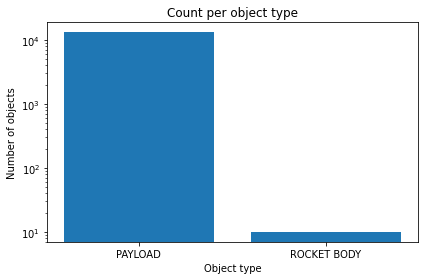

In [14]:
#Type of satellite chart

import matplotlib.pyplot as plt

q1 = queries["-- Q1) Count each object type"]  

with sqlite3.connect(db_path) as conn:
    df_q1 = pd.read_sql_query(q1, conn)

display(df_q1)

plt.figure(figsize=(6, 4))

# Just in case, sort by n_objects descending
df_plot = df_q1.sort_values("n_objects", ascending=False)

plt.bar(df_plot["object_type"], df_plot["n_objects"])
plt.title("Count per object type")
plt.xlabel("Object type")
plt.ylabel("Number of objects")
plt.yscale('log')
plt.tight_layout()
plt.show()

,object_type,altitude_bin,n_objects,avg_eccentricity
0,PAYLOAD,0–1000 km,11300,0.000377
1,ROCKET BODY,0–1000 km,7,0.008367
2,PAYLOAD,1000–20000 km,1045,0.005098
3,ROCKET BODY,1000–20000 km,3,0.230302
4,PAYLOAD,20000–36000 km,705,0.024598
5,PAYLOAD,>= 36000 km,28,0.358442


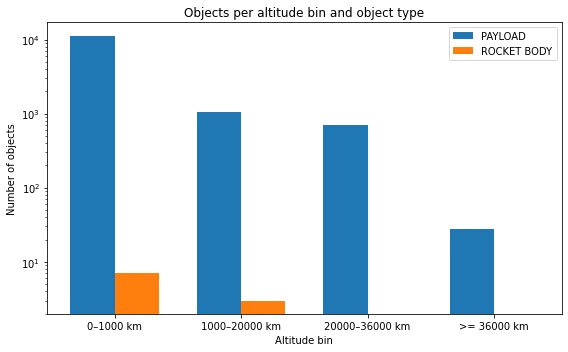

In [17]:
q2 = queries["-- Q2) altitude bins by object type"]

with sqlite3.connect(db_path) as conn:
    df_q2 = pd.read_sql_query(q2, conn)

display(df_q2)

import numpy as np

# Order altitude bins
altitude_order = ["0–1000 km", "1000–20000 km", "20000–36000 km", ">= 36000 km"]
df_q2["altitude_bin"] = pd.Categorical(df_q2["altitude_bin"], categories=altitude_order, ordered=True)
df_q2 = df_q2.sort_values(["altitude_bin", "object_type"])

bins = df_q2["altitude_bin"].cat.categories
object_types = df_q2["object_type"].unique()

x = np.arange(len(bins))
width = 0.35  # bin width

plt.figure(figsize=(8, 5))

for i, obj_type in enumerate(object_types):
    subset = df_q2[df_q2["object_type"] == obj_type]
    counts = []
    for b in bins:
        row = subset[subset["altitude_bin"] == b]
        counts.append(int(row["n_objects"].iloc[0]) if not row.empty else 0)

    plt.bar(x + i*width - (width*(len(object_types)-1)/2),
            counts,
            width,
            label=obj_type)

plt.xticks(x, bins, rotation=0)
plt.xlabel("Altitude bin")
plt.ylabel("Number of objects")
plt.yscale('log')
plt.title("Objects per altitude bin and object type")
plt.legend()
plt.tight_layout()
plt.show()

,orbital_band,n_objects
0,LEO-Inclined,5849
1,LEO-Equatorial,3429
2,LEO-Polar,2992
3,GEO,455
4,MEO,264
5,GEO-Inclined,63
6,HEO,28
7,LEO-Retrograde,8


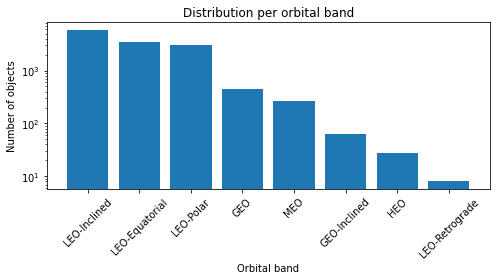

In [25]:
q3 = queries["-- Q3) Distribution per orbital class"]  

with sqlite3.connect(db_path) as conn:
    df_q3 = pd.read_sql_query(q3, conn)

display(df_q3)

plt.figure(figsize=(7, 4))

plt.bar(df_q3["orbital_band"], df_q3["n_objects"])

plt.title("Distribution per orbital band")
plt.xlabel("Orbital band")
plt.ylabel("Number of objects")
plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,orbital_band,n_objects,avg_altitude_km,min_altitude_km,max_altitude_km,avg_eccentricity
0,LEO-Equatorial,3429,497.170954,161.440185,1052.020317,0.000202
1,LEO-Inclined,5849,518.777289,136.628422,1759.395833,0.000463
2,LEO-Retrograde,8,569.435245,437.870013,817.219618,0.009224
3,LEO-Polar,2992,752.901482,158.130822,1503.268215,0.000836
4,MEO,264,22200.230737,2022.320996,35785.992249,0.079250
5,GEO,455,35787.307824,35786.036821,35848.973369,0.001211
6,GEO-Inclined,63,35792.817077,35786.034018,35899.406673,0.003639
7,HEO,28,48943.543655,36047.669130,91387.928189,0.358442


,orbital_band,n_objects,avg_altitude_km,min_altitude_km,max_altitude_km,avg_eccentricity
0,LEO-Equatorial,3429,497.170954,161.440185,1052.020317,0.000202
1,LEO-Inclined,5849,518.777289,136.628422,1759.395833,0.000463
2,LEO-Retrograde,8,569.435245,437.870013,817.219618,0.009224
3,LEO-Polar,2992,752.901482,158.130822,1503.268215,0.000836


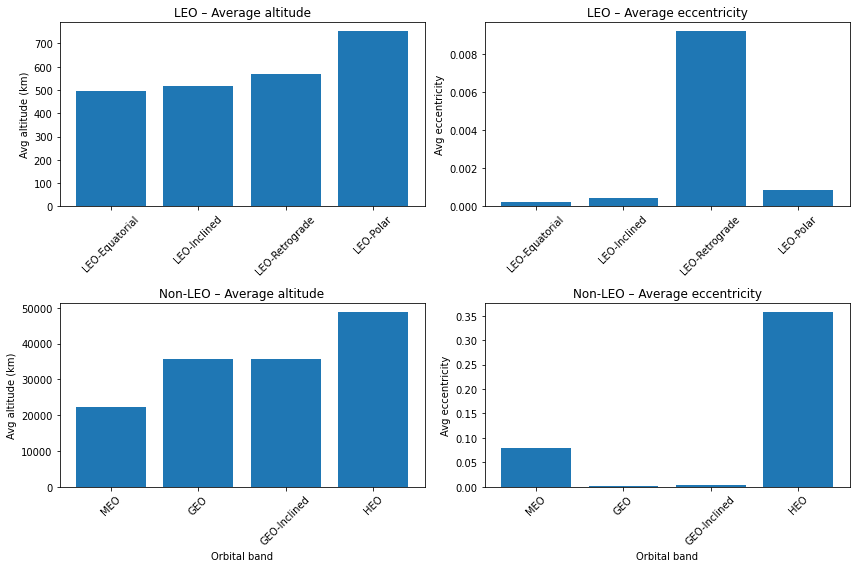

In [35]:
q4 = queries["-- Q4) Altitude and eccentricity per orbital class"] 

with sqlite3.connect(db_path) as conn:
    df_q4 = pd.read_sql_query(q4, conn)

display(df_q4)

# LEO bands = any orbital_band that contains "LEO" (case-insensitive)
df_leo = df_q4[df_q4["orbital_band"].str.contains("LEO", case=False, na=False)]

# Non-LEO bands = all others
df_non_leo = df_q4[~df_q4["orbital_band"].str.contains("LEO", case=False, na=False)]

display(df_leo)

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=False)

# --- 1) LEO – Avg altitude ---
axes[0, 0].bar(df_leo["orbital_band"], df_leo["avg_altitude_km"])
axes[0, 0].set_title("LEO – Average altitude")
axes[0, 0].set_ylabel("Avg altitude (km)")
axes[0, 0].tick_params(axis="x", rotation=45)

# --- 2) LEO – Avg eccentricity ---
axes[0, 1].bar(df_leo["orbital_band"], df_leo["avg_eccentricity"])
axes[0, 1].set_title("LEO – Average eccentricity")
axes[0, 1].set_ylabel("Avg eccentricity")
axes[0, 1].tick_params(axis="x", rotation=45)

# --- 3) Non-LEO – Avg altitude ---
axes[1, 0].bar(df_non_leo["orbital_band"], df_non_leo["avg_altitude_km"])
axes[1, 0].set_title("Non-LEO – Average altitude")
axes[1, 0].set_xlabel("Orbital band")
axes[1, 0].set_ylabel("Avg altitude (km)")
axes[1, 0].tick_params(axis="x", rotation=45)

# --- 4) Non-LEO – Avg eccentricity ---
axes[1, 1].bar(df_non_leo["orbital_band"], df_non_leo["avg_eccentricity"])
axes[1, 1].set_title("Non-LEO – Average eccentricity")
axes[1, 1].set_xlabel("Orbital band")
axes[1, 1].set_ylabel("Avg eccentricity")
axes[1, 1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

,country,n_payloads
0,US,10089
1,PRC,948
2,UK,691
3,CIS,232
4,JPN,98
5,IND,69
6,FR,65
7,ESA,60
8,IT,59
9,GER,52


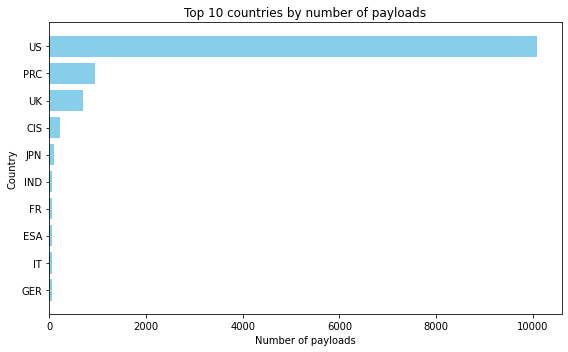

In [38]:
q5 = queries["-- Q5) Countries with more payloads"]  # usa la tua key esatta

with sqlite3.connect(db_path) as conn:
    df_q5 = pd.read_sql_query(q5, conn)

display(df_q5)

plt.figure(figsize=(8, 5))

plt.barh(df_q5["country"], df_q5["n_payloads"], color="skyblue")

plt.xlabel("Number of payloads")
plt.ylabel("Country")
plt.title("Top 10 countries by number of payloads")

# Invert the order so the highest value appears on top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

,ecc_bin,n_objects,avg_altitude_km,avg_inclination_deg
0,quasi-circular,12940,2358.053471,58.155924
1,low-eccentricity,98,6851.055318,67.913601
2,high-eccentricity,37,34826.845931,57.358951
3,medium-eccentricity,13,22508.332173,29.423831


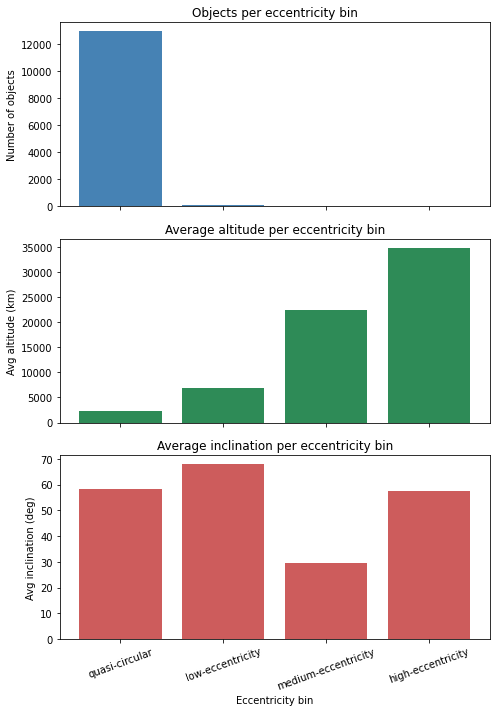

In [45]:
q6 = queries["-- Q6) Bucket of eccentricity and altitude"]

with sqlite3.connect(db_path) as conn:
    df_q6 = pd.read_sql_query(q6, conn)

display(df_q6)

order = ["quasi-circular", "low-eccentricity", "medium-eccentricity", "high-eccentricity"]
df_q6["ecc_bin"] = pd.Categorical(df_q6["ecc_bin"], categories=order, ordered=True)
df_q6 = df_q6.sort_values("ecc_bin")

bins = df_q6["ecc_bin"]

fig, axes = plt.subplots(3, 1, figsize=(7, 10), sharex=True)


# --- 1) Number of objects ---
axes[0].bar(bins, df_q6["n_objects"], color="steelblue")
axes[0].set_ylabel("Number of objects")
axes[0].set_title("Objects per eccentricity bin")


# --- 2) Average altitude ---
axes[1].bar(bins, df_q6["avg_altitude_km"], color="seagreen")
axes[1].set_ylabel("Avg altitude (km)")
axes[1].set_title("Average altitude per eccentricity bin")


# --- 3) Average inclination ---
axes[2].bar(bins, df_q6["avg_inclination_deg"], color="indianred")
axes[2].set_xlabel("Eccentricity bin")
axes[2].set_ylabel("Avg inclination (deg)")
axes[2].set_title("Average inclination per eccentricity bin")

plt.setp(axes[2].get_xticklabels(), rotation=20)
plt.tight_layout()
plt.show()

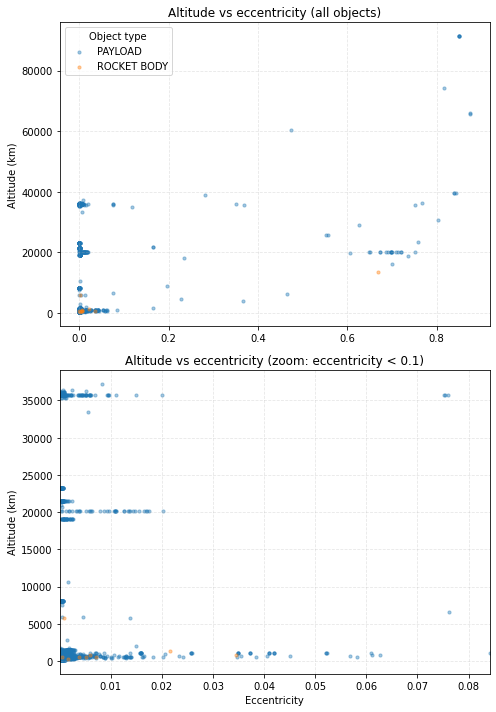

In [49]:
q7 = queries["-- Q7) Data for altitude vs eccentricity scatter"]  # use your exact key

with sqlite3.connect(db_path) as conn:
    df_q7 = pd.read_sql_query(q7, conn)

df_q7.head()

df_q7_low_ecc = df_q7[df_q7["eccentricity"] < 0.1]


# --- FIGURE WITH PROPER ZOOM ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 10), sharex=False)

# --- 1) FULL SCATTER ---
for obj_type, group in df_q7.groupby("object_type"):
    ax1.scatter(
        group["eccentricity"],
        group["altitude_km"],
        alpha=0.4,
        s=10,
        label=obj_type
    )

ax1.set_ylabel("Altitude (km)")
ax1.set_title("Altitude vs eccentricity (all objects)")
ax1.grid(True, linestyle="--", alpha=0.3)
ax1.legend(title="Object type", loc="best")

# --- 2) ZOOM (eccentricity < 0.1) ---
for obj_type, group in df_q7_low_ecc.groupby("object_type"):
    ax2.scatter(
        group["eccentricity"],
        group["altitude_km"],
        alpha=0.4,
        s=10,
        label=obj_type
    )

ax2.set_xlabel("Eccentricity")
ax2.set_ylabel("Altitude (km)")
ax2.set_title("Altitude vs eccentricity (zoom: eccentricity < 0.1)")
ax2.grid(True, linestyle="--", alpha=0.3)

# *** True zoom: set axis limits based on filtered data ***
ax2.set_xlim(df_q7_low_ecc["eccentricity"].min(), df_q7_low_ecc["eccentricity"].max())

# Optional but nice: same y-limits as full plot or tailored y-zoom
# ax2.set_ylim(-100, df_q7_low_ecc["altitude_km"].max() + 100)

plt.tight_layout()
plt.show()

In [54]:
db_path = Path("../data/processed/satellites.db")
print(db_path.exists())  # qui dovrebbe dare True

conn = sqlite3.connect(db_path)
cursor = conn.cursor()
cursor.execute("PRAGMA table_info(satellites_clean);")
cols = cursor.fetchall()
conn.close()

cols

True


[(0, 'norad_id', 'INT', 0, None, 0),
 (1, 'name', 'TEXT', 0, None, 0),
 (2, 'object_type', 'TEXT', 0, None, 0),
 (3, 'satellite_constellation', 'TEXT', 0, None, 0),
 (4, 'altitude_km', 'REAL', 0, None, 0),
 (5, 'altitude_category', 'TEXT', 0, None, 0),
 (6, 'orbital_band', 'TEXT', 0, None, 0),
 (7, 'congestion_risk', 'TEXT', 0, None, 0),
 (8, 'inclination', 'REAL', 0, None, 0),
 (9, 'eccentricity', 'REAL', 0, None, 0),
 (10, 'launch_year_estimate', 'INT', 0, None, 0),
 (11, 'days_in_orbit_estimate', 'INT', 0, None, 0),
 (12, 'orbit_lifetime_category', 'TEXT', 0, None, 0),
 (13, 'mean_motion', 'REAL', 0, None, 0),
 (14, 'epoch', 'TEXT', 0, None, 0),
 (15, 'data_source', 'TEXT', 0, None, 0),
 (16, 'snapshot_date', 'TEXT', 0, None, 0),
 (17, 'country', 'TEXT', 0, None, 0),
 (18, 'last_seen', 'TEXT', 0, None, 0),
 (19, 'period_minutes', '', 0, None, 0)]